# ĐỒ ÁN CUỐI KỲ - PHÂN TÍCH DỮ LIỆU BẢO TOÀN TÍNH RIÊNG TƯ

## THÀNH VIÊN NHÓM:

- 22120304 - Nguyễn Thị Kim Quý

- 22120338 - Đỗ Hạnh Thảo

- 22120352 - Phạm Nguyễn Quang Thoại

In [94]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### 1. Đọc file

In [95]:
train_data = pd.read_csv('train.csv')

print("Số dòng trong train.csv", len(train_data))
print(f"\nSố cột: {len(train_data.columns)}")
print("Tên các cột:", list(train_data.columns))
print("\n 5 dòng đầu trong train.csv:\n")
print(train_data.head())

Số dòng trong train.csv 1317

Số cột: 20
Tên các cột: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

 5 dòng đầu trong train.csv:

        Make                                    Model    Price  Year  Kilometer Fuel Type Transmission   Location   Color   Owner Seller Type   Engine           Max Power         Max Torque  \
0  Ssangyong                               Rexton RX7   975000  2013      72000    Diesel    Automatic  Bangalore  Silver   First  Individual  2696 cc  184 bhp @ 4000 rpm  402 Nm @ 3000 rpm   
1    Hyundai  Creta SX (O) 1.5 Petrol CVT [2020-2022]  1748999  2022       2670    Petrol    Automatic    Kolkata   White   First  Individual  1497 cc  113 bhp @ 6300 rpm  144 Nm @ 4500 rpm   
2       Audi                     A4 2.0 TDI (143 bhp)  1150000  2012      40031    Diesel   

### 2. Tiền xử lý dữ liệu

In [96]:
# Hàm trích xuất số từ chuỗi
def extract_number(s):
    if pd.isna(s):
        return np.nan
    match = re.search(r'(\d+)', str(s).replace(',', ''))
    if match:
        return int(match.group(1))
    return np.nan

# Hàm mã hóa nhãn
def label_encode(series):
    uniques = series.dropna().unique()
    mapping = {k: v for v, k in enumerate(sorted(uniques))}
    encoded = series.map(mapping)
    return encoded, mapping

In [97]:
# Bước 1: Trích số từ các cột chuỗi số
for col in ['Engine', 'Max Power', 'Max Torque']:
    train_data[col] = train_data[col].apply(extract_number)
    
# Bước 2: Label encoding thủ công cho các cột phân loại
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 
                    'Color', 'Owner', 'Seller Type', 'Drivetrain']
mappings = {}
# Lưu mode để xử lý NaN trong test
categorical_modes = {}
categorical_means = {}
categorical_stds = {}
train_data_means = {}
train_data_stds = {}
  

# Với categorical NaN -> Điền thiếu bằng mode (giá trị xuất hiện nhiều nhất)
for col in categorical_cols:
    mode = train_data[col].mode()[0]  # lấy giá trị xuất hiện nhiều nhất
    train_data[col] = train_data[col].fillna(mode)

# In ra giá trị được fill
for col in categorical_cols:
    mode = train_data[col].mode()[0]
    categorical_modes[col] = mode
    # print(f"Mode of {col}: {mode}")

# Label encoding
for col in categorical_cols:
    train_data[col], mappings[col] = label_encode(train_data[col])

# Chuẩn hóa dữ liệu categorical
for col in categorical_cols:
    mean = train_data[col].mean()
    std = train_data[col].std()
    if std == 0:
        std = 1e-8  # tránh chia 0
    categorical_means[col] = mean
    categorical_stds[col] = std
    train_data[col] = (train_data[col] - mean) / std
    
# Với numeric NaN -> trung bình cột train
numeric_cols = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 
                'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

for col in numeric_cols:
    mean = train_data[col].mean()
    std = train_data[col].std()
    if std == 0:
        std = 1e-8
    train_data_means[col] = mean
    train_data_stds[col] = std
    train_data[col] = train_data[col].fillna(mean)
    train_data[col] = (train_data[col] - mean) / std

# Shuffle toàn bộ dữ liệu để đảm bảo phân phối ngẫu nhiên
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Tính số mẫu cho tập train
train_size = int(0.8 * len(train_data))

# Tách thủ công
train_part = train_data[:train_size]
val_part = train_data[train_size:]

# Bước 5: Tách X và Y
X_train = train_part.drop(columns=['Price'])
y_train = train_part['Price']

X_val = val_part.drop(columns=['Price'])
y_val = val_part['Price']

print("Sau khi tiền xử lý dữ liệu cho train_data: ")

print("Train.shape = ", X_train.shape)
print("Các cột trong X_train:", list(X_train.columns))
print("Tổng số cột trong X_train:", len(X_train.columns))
print("\n 5 dòng đầu trong X_train đã xử lý:\n")
pd.set_option('display.max_columns', None)  # Hiện tất cả các cột
pd.set_option('display.width', 200)         # Tăng chiều rộng hiển thị
print(X_train.head())

Sau khi tiền xử lý dữ liệu cho train_data: 
Train.shape =  (1053, 19)
Các cột trong X_train: ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Tổng số cột trong X_train: 19

 5 dòng đầu trong X_train đã xử lý:

       Make     Model      Year  Kilometer  Fuel Type  Transmission  Location     Color     Owner  Seller Type    Engine  Max Power  Max Torque  Drivetrain    Length     Width    Height  \
0  0.551763 -1.199533  0.766433  -0.339790  -0.902065     -1.089406 -0.858409 -1.926505 -0.492233     0.186028  0.359781   0.938467    1.059318    1.819817  0.889563  0.296545 -1.108091   
1 -0.778030 -0.043865  0.181108  -0.081124   1.088752     -1.089406  1.302465  0.663426 -0.492233     0.186028 -0.763493  -0.748905   -0.936126   -0.048226 -1.156107 -0.793069 -0.529312   
2  0.551763  0.240803 -0.696878   0.1

In [98]:
print("Sau khi tiền xử lý dữ liệu cho train_data: ")

print("Val.shape = ", X_val.shape)
print("Các cột trong X_val:", list(X_val.columns))
print("Tổng số cột trong X_train:", len(X_val.columns))
print("\n 5 dòng đầu trong X_val đã xử lý:\n")
pd.set_option('display.max_columns', None)  # Hiện tất cả các cột
pd.set_option('display.width', 200)         # Tăng chiều rộng hiển thị
print(X_val.head())

Sau khi tiền xử lý dữ liệu cho train_data: 
Val.shape =  (264, 19)
Các cột trong X_val: ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Tổng số cột trong X_train: 19

 5 dòng đầu trong X_val đã xử lý:

          Make     Model      Year  Kilometer  Fuel Type  Transmission  Location     Color     Owner  Seller Type    Engine  Max Power  Max Torque  Drivetrain    Length     Width    Height  \
1053 -1.019811 -1.339743  0.766433  -0.308288  -0.902065      0.917234 -1.246258  0.848421 -0.492233     0.186028 -0.314482  -0.475277   -0.231441   -0.048226 -0.645245 -0.473449 -0.492211   
1054  0.430872 -1.276011  0.181108  -0.229532   1.088752     -1.089406  1.302465 -1.556515 -0.492233     0.186028 -0.763493  -0.718502   -0.929149   -0.048226 -0.645245 -0.175621 -0.677717   
1055 -0.536250  1.455953 -0.404216 

### 3.1 - 3.2: Xây dựng mô hình và huấn luyện

Mô hình: Linear Regression

Thuật toán tối ưu: Stochastic Gradient Descent

**Các cột dữ liệu được chọn**:

- Make: Thương hiệu của xe. Các thương hiệu lớn và uy tín thường có giá trị cao hơn nhờ chất lượng, độ bền và nhận diện thương hiệu.

- Year: Năm sản xuất ảnh hưởng đến độ mới và giá trị còn lại của xe. Xe càng mới thường có giá cao hơn.

- Kilometer: Số km xe đã đi là chỉ số phản ánh mức độ sử dụng và hao mòn – ảnh hưởng trực tiếp đến giá trị xe.

- Fuel Type: Loại nhiên liệu (xăng, dầu, điện, hybrid...) có ảnh hưởng đến chi phí sử dụng và giá bán. Xe điện/hybrid thường có giá cao hơn.

- Transmission: Hộp số của xe (tự động hoặc số sàn). Xe số tự động thường có giá cao hơn xe số sàn do tiện lợi hơn khi lái.

- Owner: Xe đã qua nhiều chủ có thể bị đánh giá thấp hơn về độ tin cậy, từ đó ảnh hưởng đến giá.

- Seller Type: Đơn vị bán (cá nhân, đại lý, showroom) chuyên nghiệp thường có độ uy tín cao hơn, khiến giá bán có thể cao hơn.

- Engine: Dung tích hoặc công suất động cơ. Động cơ lớn hơn thường cho hiệu suất cao hơn, kéo theo giá trị xe tăng.

- Max Power: Công suất cực đại thể hiện hiệu năng vận hành – thường tỷ lệ thuận với giá xe.

- Drivetrain: Hệ thống truyền động (FWD, RWD, AWD...) ảnh hưởng đến khả năng vận hành và phù hợp với điều kiện địa hình – từ đó ảnh hưởng đến giá.

- Seating Capacity: Sức chứa của xe. Xe 4 chỗ, 7 chỗ hay 9 chỗ phục vụ các nhu cầu khác nhau và có mức giá khác nhau.

- Fuel Tank Capacity: Dung tích bình nhiên liệu không ảnh hưởng lớn đến giá, nhưng phần nào phản ánh kích thước và phân khúc xe.

**Các công thức hồi quy sẽ sử dụng**:

**Công thức 1**:  y = a1​x1 ​+ a2​x2 ​+  ⋯ + a12​x12​

**Công thức 2**: y = a1x1 + a2x2 + a2x2^2 + a3x3 + a3x3^2 + a4x4 + a5x5 + a6x6 + a7x7 + a8x8 + a8x8^2 + a9x9 + a9x9^2 +  a10x10 + a11x11 + a12x12 + a12x12^2  

**Công thức 3**: 
- y = a1​x1 ​+ a2​x2 ​+  ⋯ + a12​x12

+ a13(x1 + x2) + a14(x2 + x3) + a15(x4 + x8) + a16(x4 +x9) + a17(x8 + x10) + a18(x11 + x12)

+ a19(x2 * x3) + a20(x8 * x9) + a21(x9 * x12) a22(x3 * x11) + a23(x4 * x5) + a24(x6 * x7)

+ a25safe_sqrt(x3) + a26safe_sqrt(x8) + a27safe_sqrt(x9) + a28safe_sqrt(x12)

+ a29x2^2 + a30x3^2 + a31x8^2 + a32x9^2 + a33x12^2

+ a34safe_sqrt(x3 * x9)

**Công thức 4: Ridge Regression (L2 Regularization)**: λ∑(ai^2): Tránh overfitting

In [99]:
cols = ['Make','Year', 'Kilometer', 'Fuel Type', 'Transmission','Owner','Seller Type', 'Engine', 'Max Power','Drivetrain','Seating Capacity', 'Fuel Tank Capacity']
X_train_official = X_train[cols]
X_val_official = X_val[cols]

print("Columns in X_train:", list(X_train_official.columns))
print("5 dòng dữ liệu đầu:\n", X_train_official.head())

print("\nColumns in X_val:", list(X_val_official.columns))
print("5 dòng dữ liệu đầu:\n", X_val_official.head())

Columns in X_train: ['Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Drivetrain', 'Seating Capacity', 'Fuel Tank Capacity']
5 dòng dữ liệu đầu:
        Make      Year  Kilometer  Fuel Type  Transmission     Owner  Seller Type    Engine  Max Power  Drivetrain  Seating Capacity  Fuel Tank Capacity
0  0.551763  0.766433  -0.339790  -0.902065     -1.089406 -0.492233     0.186028  0.359781   0.938467    1.819817         -0.381535            0.867927
1 -0.778030  0.181108  -0.081124   1.088752     -1.089406 -0.492233     0.186028 -0.763493  -0.748905   -0.048226         -0.381535           -0.602007
2  0.551763 -0.696878   0.164248  -0.902065     -1.089406  1.636735     0.186028  1.921624   1.880963   -1.916269         -0.381535            1.123568
3  0.430872 -0.989540  -0.135025   1.088752      0.917234 -0.492233     0.186028 -1.060347  -0.961726   -0.048226         -0.381535           -1.113289
4  0.551763  1.059095  -0.576058  -0.

In [100]:
# Tính mean và std của y_train
y_mean = y_train.mean()
y_std = y_train.std()

# Chuẩn hóa y_train
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

In [101]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sgd_linear_regression(X, y, transform_fn, lr=1e-6, max_epoch=500, lambda_l2=0.0,
                          X_val=None, y_val=None):
    n_samples = X.shape[0]
    X_transformed = transform_fn(X)
    n_features = X_transformed.shape[1]
    weights = np.zeros(n_features)

    for epoch in range(max_epoch):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        for i in indices:
            xi = X_transformed[i]
            yi = y[i]
            y_pred = np.dot(weights, xi)
            error = y_pred - yi
            gradient = error * xi + 2 * lambda_l2 * weights

            if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
                continue

            weights_new = weights - lr * gradient
            if np.any(np.isnan(weights_new)) or np.any(np.isinf(weights_new)):
                continue

            weights = weights_new

    # Kết thúc huấn luyện → dự đoán trên train
    y_pred_scaled = np.dot(X_transformed, weights)
    mse_scaled = mean_squared_error(y, y_pred_scaled)
    y_pred_original = y_pred_scaled * y_std + y_mean
    y_original = y * y_std + y_mean
    mse_original = mean_squared_error(y_original, y_pred_original)

    # Dự đoán trên validation nếu có
    val_mse_original, val_mse_scaled = None, None
    if X_val is not None and y_val is not None:
        X_val_transformed = transform_fn(X_val)
        y_val_pred_scaled = np.dot(X_val_transformed, weights)
        val_mse_scaled = mean_squared_error(y_val, y_val_pred_scaled)
        y_val_pred_original = y_val_pred_scaled * y_std + y_mean
        y_val_original = y_val * y_std + y_mean
        val_mse_original = mean_squared_error(y_val_original, y_val_pred_original)

    return weights, mse_original, mse_scaled, val_mse_original, val_mse_scaled



In [102]:
#Công thức 1
def formula_1(X):  
    return X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [103]:
#Công thức 2
def formula_2(X):  
    return np.column_stack((
        X[:,0],         # Make
        X[:,1],         # Year
        X[:,1]**2,      # Year^2
        X[:,2],         # Kilometer
        X[:,2]**2,      # Kilometer^2
        X[:,3],         # Fuel Type    
        X[:,4],         # Transmission
        X[:,5],         # Owner
        X[:,6],         # Seller Type
        X[:,7],         # Engine
        X[:,7]**2,      # Engine^2
        X[:,8],         # Max Power
        X[:,8]**2,      # Max Power^2
        X[:,9],         # Drivetrain
        X[:,10],        # Seating Capacity
        X[:,11],        # Fuel Tank Capacity
        X[:,11]**2,     # Fuel Tank Capacity^2
    ))
    
# Bỏ qua Seating Capacity, Drivetrain, Owner, Fuel Type, Seller Type vì chúng là dạng phân loại đã chuẩn hóa → không nên bình phương.

In [104]:
# Công thức 3
def formula_3(X):
    x1 = X[:, 0]                # Make
    x2 = X[:, 1]                # Year
    x3 = X[:, 2]                # Kilometer
    x4 = X[:, 3]                # Fuel Type
    x5 = X[:, 4]                # Transmission
    x6 = X[:, 5]                # Owner
    x7 = X[:, 6]                # Seller Type
    x8 = X[:, 7]                # Engine
    x9 = X[:, 8]                # Max Power
    x10 = X[:, 9]               # Drivetrain
    x11 = X[:, 10]              # Seating Capacity
    x12 = X[:, 11]              # Fuel Tank Capacity
    
    safe_sqrt = lambda x: np.sqrt(np.abs(x))
    safe_log = lambda x: np.log1p(np.abs(x))
    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    return np.column_stack((
        # --------- Gốc ---------
        x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12,

        # --------- Tổng ---------
        x1 + x2, x2 + x3, x4 + x8, x4 + x9, x8 + x10, x11 + x12,

        # --------- Nhân ---------
        x2 * x3, x8 * x9, x9 * x12, x3 * x11, x4 * x5, x6 * x7,

        # --------- Căn bậc hai ---------
        safe_sqrt(x3), safe_sqrt(x8), safe_sqrt(x9), safe_sqrt(x12),

        # --------- Bình phương ---------
        x2**2, x3**2, x8**2, x9**2, x12**2,
        
        # --------- Tương tác khác ---------
        safe_sqrt(x3 * x9)  
    ))

In [105]:
# Công thức 4
def formula_4_ridge(X):  
    return(X)

In [108]:
weights1, mse1, mse_scaled1, val_mse1, val_mse_scaled1 = sgd_linear_regression(
    X_train_official.values,
    y_train_scaled.values,
    formula_1,
    lambda_l2=0.0,
    X_val=X_val_official.values,
    y_val=y_val_scaled.values
)

print("Công thức 1:")
print(f"MSE (Train, gốc): {mse1:.2f}")
print(f"MSE (Train, chuẩn hóa): {mse_scaled1:.2f}")
print(f"MSE (Val, gốc): {val_mse1:.2f}")
print(f"MSE (Val, chuẩn hóa): {val_mse_scaled1:.2f}")
print(f"Weights: {weights1}\n")

Công thức 1:
MSE (Train, gốc): 2543830550897.08
MSE (Train, chuẩn hóa): 0.44
MSE (Val, gốc): 2769501836302.59
MSE (Val, chuẩn hóa): 0.48
Weights: [-0.00605606  0.11219297 -0.04959449 -0.01908129 -0.11729359  0.0056488
 -0.02213693  0.16031733  0.21655429 -0.0223691  -0.03133778  0.14284323]



In [109]:
weights2, mse2, mse_scaled2, val_mse2, val_mse_scaled2 = sgd_linear_regression(
    X_train_official.values,
    y_train_scaled.values,
    formula_2,
    lambda_l2=0.0,
    X_val=X_val_official.values,
    y_val=y_val_scaled.values
)

print("Công thức 2:")
print(f"MSE (Train, gốc): {mse2:.2f}")
print(f"MSE (Train, chuẩn hóa): {mse_scaled2:.2f}")
print(f"MSE (Val, gốc): {val_mse2:.2f}")
print(f"MSE (Val, chuẩn hóa): {val_mse_scaled2:.2f}")
print(f"Weights: {weights2}\n")

Công thức 2:
MSE (Train, gốc): 2199783524440.65
MSE (Train, chuẩn hóa): 0.38
MSE (Val, gốc): 2456351638774.54
MSE (Val, chuẩn hóa): 0.42
Weights: [-0.01166753  0.11817981 -0.03341096 -0.05168823  0.00129078 -0.03924224
 -0.10881039 -0.00487749 -0.0148374   0.08900102 -0.00996293  0.14025925
  0.1050952  -0.01940668 -0.02034312  0.11831712  0.05575117]



In [110]:
weights3, mse3, mse_scaled3, val_mse3, val_mse_scaled3 = sgd_linear_regression(
    X_train_official.values,
    y_train_scaled.values,
    formula_3,
    lambda_l2=0.0,
    X_val=X_val_official.values,
    y_val=y_val_scaled.values
)

print("Công thức 3:")
print(f"MSE (Train, gốc): {mse3:.2f}")
print(f"MSE (Train, chuẩn hóa): {mse_scaled3:.2f}")
print(f"MSE (Val, gốc): {val_mse3:.2f}")
print(f"MSE (Val, chuẩn hóa): {val_mse_scaled3:.2f}")
print(f"Weights: {weights3}\n")

Công thức 3:
MSE (Train, gốc): 2017107225624.62
MSE (Train, chuẩn hóa): 0.35
MSE (Val, gốc): 2102989275642.50
MSE (Val, chuẩn hóa): 0.36
Weights: [-0.03214594  0.093922   -0.04718588 -0.04862204 -0.09295839 -0.00200782
 -0.01136842  0.06339111  0.11310483 -0.0294671  -0.04178643  0.09094156
  0.06177606  0.04673612  0.01476907  0.06448279  0.03392401  0.04915513
 -0.00497494  0.02018469  0.04699576 -0.01505652  0.02140264  0.00771887
 -0.02269537 -0.04159768 -0.01565835 -0.03339651 -0.01550679 -0.00032205
 -0.02717623  0.08521567  0.04582939 -0.00141488]



In [111]:
weights4, mse4, mse_scaled4, val_mse4, val_mse_scaled4 = sgd_linear_regression(
    X_train_official.values,
    y_train_scaled.values,
    formula_4_ridge,
    lambda_l2=0.01,
    X_val=X_val_official.values,
    y_val=y_val_scaled.values
)

print("Công thức 4:")
print(f"MSE (Train, gốc): {mse4:.2f}")
print(f"MSE (Train, chuẩn hóa): {mse_scaled4:.2f}")
print(f"MSE (Val, gốc): {val_mse4:.2f}")
print(f"MSE (Val, chuẩn hóa): {val_mse_scaled4:.2f}")
print(f"Weights: {weights4}\n")

Công thức 4:
MSE (Train, gốc): 2549024730671.60
MSE (Train, chuẩn hóa): 0.44
MSE (Val, gốc): 2774931566649.80
MSE (Val, chuẩn hóa): 0.48
Weights: [-0.00604425  0.11167406 -0.04937462 -0.01905623 -0.11686309  0.00563767
 -0.02205441  0.15969965  0.21566099 -0.02228296 -0.03114062  0.14230456]



In [112]:
mse_list = [mse1, mse2, mse3, mse4]
mse_scaled_list = [mse_scaled1, mse_scaled2, mse_scaled3, mse_scaled4]
best_formula_index = mse_list.index(min(mse_list)) 

print(f"Công thức tốt nhất là công thức {best_formula_index + 1} với MSE = {min(mse_list):.2f}\n Và MSE (chuẩn hoá): {mse_scaled_list[best_formula_index]}")


Công thức tốt nhất là công thức 3 với MSE = 2017107225624.62
 Và MSE (chuẩn hoá): 0.3482208481126286


### Đọc file test.csv

In [113]:
test_data = pd.read_csv('test.csv')
print("Số dòng trong test.csv", len(test_data))
print(f"\nSố cột: {len(test_data.columns)}")
print("Tên các cột:", list(test_data.columns))
print("\n 5 dòng đầu trong test.csv:\n")
print(test_data.head())

Số dòng trong test.csv 330

Số cột: 20
Tên các cột: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

 5 dòng đầu trong test.csv:

            Make                           Model    Price  Year  Kilometer Fuel Type Transmission  Location   Color   Owner Seller Type   Engine           Max Power         Max Torque Drivetrain  \
0           Ford      Endeavour Trend 2.2 4x2 AT  2350000  2016      75000    Diesel    Automatic    Mohali   White  Second  Individual  2198 cc  158 bhp @ 3200 rpm  385 Nm @ 1600 rpm        RWD   
1         Toyota  Urban Cruiser Premium Grade AT  1050000  2021       1910    Petrol    Automatic  Varanasi   White   First  Individual  1462 cc  103 bhp @ 6000 rpm  138 Nm @ 4400 rpm        FWD   
2  Maruti Suzuki                    Alto 800 Lxi   210000  2014      42505    Pe

In [114]:
# Bước 1: Trích số từ các cột chuỗi số
for col in ['Engine', 'Max Power', 'Max Torque']:
    test_data[col] = test_data[col].apply(extract_number)

# Bước 2: Xử lý các cột phân loại
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 
                    'Color', 'Owner', 'Seller Type', 'Drivetrain']

# Điền thiếu bằng mode đã lưu từ train
for col in categorical_cols:
    mode = categorical_modes[col]  # dùng mode từ train
    test_data[col] = test_data[col].fillna(mode)

# Label encoding: dùng mapping từ train, gán -1 cho giá trị không có trong train
for col in categorical_cols:
    test_data[col] = test_data[col].map(mappings[col])
    test_data[col] = test_data[col].fillna(-1)  # gán -1 cho giá trị chưa từng thấy

# Chuẩn hóa categorical: dùng mean/std từ train
for col in categorical_cols:
    mean = categorical_means[col]
    std = categorical_stds[col] if categorical_stds[col] != 0 else 1e-8
    test_data[col] = (test_data[col] - mean) / std

# Bước 3: Xử lý các cột numeric
numeric_cols = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 
                'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Điền NaN bằng trung bình từ train
for col in numeric_cols:
    mean = train_data_means[col]
    test_data[col] = test_data[col].fillna(mean)

# Chuẩn hóa numeric: dùng mean/std từ train
for col in numeric_cols:
    mean = train_data_means[col]
    std = train_data_stds[col] if train_data_stds[col] != 0 else 1e-8
    test_data[col] = (test_data[col] - mean) / std

# Bước 4: Tách X và Y
y_test = test_data['Price']
X_test = test_data.drop(columns=['Price'])

# In thông tin để kiểm tra
print("Sau khi tiền xử lý dữ liệu cho test_data:")
print("Test.shape = ", X_test.shape)
print("Các cột trong X_test:", list(X_test.columns))
print("\n5 dòng đầu trong X_test đã xử lý:\n")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(X_test.head())


Sau khi tiền xử lý dữ liệu cho test_data:
Test.shape =  (330, 19)
Các cột trong X_test: ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

5 dòng đầu trong X_test đã xử lý:

       Make     Model      Year  Kilometer  Fuel Type  Transmission  Location     Color     Owner  Seller Type    Engine  Max Power  Max Torque  Drivetrain    Length     Width    Height  \
0 -1.019811 -1.717884 -0.111554   0.321759  -0.902065     -1.089406  0.637580  0.848421  1.636735     0.186028  0.729731   0.421614    0.954662    1.819817  1.347118  0.659749  1.822903   
1  1.639775 -1.717884  1.351757  -0.829494   1.088752     -1.089406  2.133570  0.848421 -0.492233     0.186028 -0.368184  -0.414471   -0.768676   -0.048226 -0.645245  0.151263  0.361116   
2  0.430872 -1.475704 -0.696878  -0.190075   1.088752      0.917234  1.357

In [115]:
X_test_official = X_test[cols]
print("Columns in X_test:", list(X_test_official.columns))
print("5 dòng dữ liệu đầu:\n", X_test_official.head())

Columns in X_test: ['Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Drivetrain', 'Seating Capacity', 'Fuel Tank Capacity']
5 dòng dữ liệu đầu:
        Make      Year  Kilometer  Fuel Type  Transmission     Owner  Seller Type    Engine  Max Power  Drivetrain  Seating Capacity  Fuel Tank Capacity
0 -1.019811 -0.111554   0.321759  -0.902065     -1.089406  1.636735     0.186028  0.729731   0.421614    1.819817          2.073393            1.762669
1  1.639775  1.351757  -0.829494   1.088752     -1.089406 -0.492233     0.186028 -0.368184  -0.414471   -0.048226         -0.381535           -0.282456
2  0.430872 -0.696878  -0.190075   1.088752      0.917234 -0.492233     0.186028 -1.361677  -1.265757   -0.048226         -0.381535           -1.113289
3 -0.898921 -0.696878   0.479271  -0.902065      0.917234 -0.492233     0.186028 -0.314482  -0.475277   -0.048226         -0.381535           -0.793738
4 -0.778030  0.473770   0.243003   1.0

In [116]:
# Tính mean và std của y_train
y_test_mean = y_train.mean()
y_test_std = y_train.std()

# Chuẩn hóa y_train
y_test_scaled = (y_test - y_test_mean) / y_test_std

In [117]:
mse_test_list = []
mse_test_scaled_list = []

for i, (weights, formula) in enumerate(zip(
    [weights1, weights2, weights3, weights4],
    [formula_1, formula_2, formula_3, formula_4_ridge]
), 1):
    # Biến đổi X_test theo công thức
    X_test_transformed = formula(X_test_official.values)
    
    # Dự đoán chuẩn hóa
    y_pred_scaled = np.dot(X_test_transformed, weights)
    
    # Dự đoán đơn vị gốc
    y_pred_original = y_pred_scaled * y_std + y_mean

    # MSE chuẩn hóa (so với y_test_scaled)
    mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
    mse_test_scaled_list.append(mse_scaled)

    # MSE đơn vị gốc (so với y_test thật)
    mse_original = mean_squared_error(y_test, y_pred_original)
    mse_test_list.append(mse_original)

    # In kết quả
    print(f"Công thức {i}:")
    print(f"-> MSE (chuẩn hóa): {mse_scaled:.4f}")
    print(f"-> MSE (đơn vị gốc): {mse_original:.2f}")
    print("-" * 40)

# Tìm công thức tốt nhất (dựa trên MSE gốc)
best_index = mse_test_list.index(min(mse_test_list)) + 1
print(f"\nCông thức tốt nhất trên tập test là: Công thức {best_index}")

Công thức 1:
-> MSE (chuẩn hóa): 0.3352
-> MSE (đơn vị gốc): 1941728132218.14
----------------------------------------
Công thức 2:
-> MSE (chuẩn hóa): 0.2361
-> MSE (đơn vị gốc): 1367593159034.62
----------------------------------------
Công thức 3:
-> MSE (chuẩn hóa): 0.2240
-> MSE (đơn vị gốc): 1297315431794.83
----------------------------------------
Công thức 4:
-> MSE (chuẩn hóa): 0.3359
-> MSE (đơn vị gốc): 1945843356684.98
----------------------------------------

Công thức tốt nhất trên tập test là: Công thức 3


### 3.3 Thêm nhiễu

In [118]:
# Lưu mean và std để chuẩn hóa và phục hồi lại đơn vị gốc
y_mean = y_train.mean()
y_std = y_train.std()

# Chuẩn hóa y_train
y_train_scaled = (y_train - y_mean) / y_std

# Hàm thêm nhiễu Laplace vào dữ liệu X (chuẩn hóa)
def add_laplace_noise(X, epsilon=1.0, sensitivity=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale, size=X.shape)
    return X + noise

# Các giá trị epsilon cần thử
epsilon_values = [0.5, 1, 5, 20]   # tương ứng với các mức: <1, 1-10, >10

# Lưu kết quả
results = []

for eps in epsilon_values:
    # Thêm nhiễu vào X_train
    X_train_dp = add_laplace_noise(X_train_official, epsilon=eps)

    # Dùng mô hình SGD Linear Regression với dữ liệu đã bị nhiễu
    weights3, mse3, mse_scaled3, val_mse3, val_mse_scaled3 = sgd_linear_regression(
        X_train_dp.values,
        y_train_scaled.values,
        formula_3,
        lambda_l2=0.0,
        X_val=X_val_official.values,
        y_val=y_val_scaled.values
    )


    results.append((eps, mse_scaled3, mse3))

    print(f"ε = {eps} → Công thức 3:")
    print(f"MSE (gốc)       = {mse3:.2f}")
    print(f"MSE (chuẩn hoá) = {mse_scaled3:.2f}")
    print(f"Weights         = {weights3}\n")

    weights2, mse2, mse_scaled2, val_mse2, val_mse_scaled2 = sgd_linear_regression(
        X_train_dp.values,
        y_train_scaled.values,
        formula_2,
        lambda_l2=0.0,
        X_val=X_val_official.values,
        y_val=y_val_scaled.values
    )
    print(f"Công thức 2:")
    print(f"MSE: {mse2:.2f}")
    print(f"MSE (chuẩn hoá): {mse_scaled2:.2f}")
    print(f"Weights: {weights2}\n")

ε = 0.5 → Công thức 3:
MSE (gốc)       = 4625540330386.87
MSE (chuẩn hoá) = 0.80
Weights         = [-0.00223871  0.01710554 -0.01646775 -0.02978995 -0.03550664  0.00394486
 -0.00036999  0.0381037   0.05127191 -0.03107163 -0.0144727   0.03384519
  0.01486683  0.0006378   0.00831375  0.02148196  0.00703207  0.01937249
 -0.00093732  0.01571684  0.00214242 -0.00347676  0.00218614 -0.00163598
 -0.00764447 -0.0059442   0.00021846 -0.011049   -0.00073792 -0.00031964
  0.0012908   0.00223868  0.00242709 -0.01213481]

Công thức 2:
MSE: 4770591347749.63
MSE (chuẩn hoá): 0.82
Weights: [ 9.45228444e-03  3.03593633e-02 -1.49032000e-03 -1.31316124e-02
 -8.46308492e-04  2.96896059e-05 -3.62465425e-02  4.41018756e-03
 -1.59454672e-03  5.61250595e-02  7.68909822e-04  7.34315374e-02
  2.97425984e-03 -2.32245506e-02  4.81401284e-03  5.39832990e-02
  1.77323319e-03]

ε = 1 → Công thức 3:
MSE (gốc)       = 3352055645629.84
MSE (chuẩn hoá) = 0.58
Weights         = [-0.02358488  0.04951762 -0.03521314 -0.045

In [119]:
### PRIVACY ACCOUNTANT
# Tính ε tích lũy nếu huấn luyện mô hình nhiều lần (basic composition)
def compute_total_epsilon(epsilon_per_iter, n_iter):
    return epsilon_per_iter * n_iter

# Ví dụ: chạy 5 lần với epsilon = 0.5
total_eps = compute_total_epsilon(0.5, 5)
print(f"Tổng epsilon sau 5 lần huấn luyện với ε=0.5 là: {total_eps}")

Tổng epsilon sau 5 lần huấn luyện với ε=0.5 là: 2.5


In [120]:
for eps, mse_scaled, mse_real in results:
    print(f"Với ε = {eps}:  MSE (chuẩn hóa) = {mse_scaled:.4f}, MSE (gốc) = {mse_real:.2f} → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn")

Với ε = 0.5:  MSE (chuẩn hóa) = 0.7985, MSE (gốc) = 4625540330386.87 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn
Với ε = 1:  MSE (chuẩn hóa) = 0.5787, MSE (gốc) = 3352055645629.84 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn
Với ε = 5:  MSE (chuẩn hóa) = 0.3678, MSE (gốc) = 2130403358677.11 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn
Với ε = 20:  MSE (chuẩn hóa) = 0.3482, MSE (gốc) = 2016777923112.36 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn


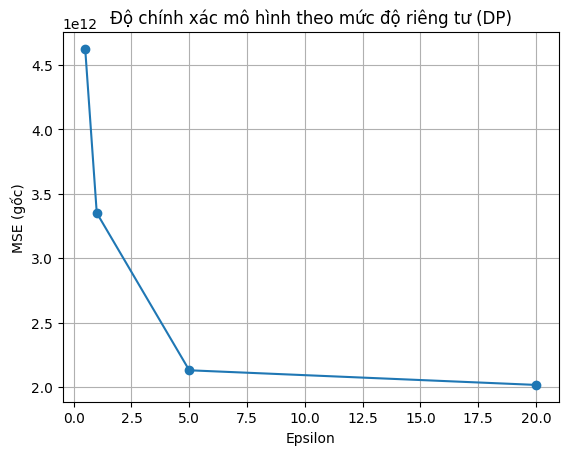

In [121]:
### VẼ BIỂU ĐỒ
plt.plot([r[0] for r in results], [r[2] for r in results], marker='o')  # dùng MSE gốc để vẽ
plt.xlabel('Epsilon')
plt.ylabel('MSE (gốc)')
plt.title('Độ chính xác mô hình theo mức độ riêng tư (DP)')
plt.grid(True)
plt.show()